In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [9]:
# Set features. This will also be used as your x values.
#only keep features that don't include "err"
X= df[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec","koi_period", "koi_time0bk","koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"]]
y=df["koi_disposition"]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,4.544,0.868,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,4.564,0.791,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,4.438,1.046,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,4.486,0.972,296.28613,48.224670,15.714


/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.15248055 0.21699137 0.13998886 0.0554456  0.07518849 0.07204116
 0.05916781 0.05657315 0.05788341 0.05675201 0.05748758]


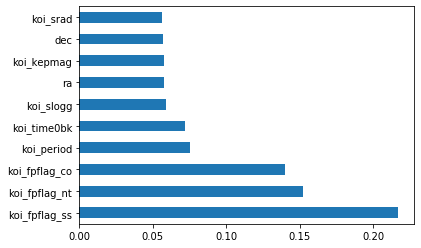

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
# Keep the top ten features:
X= df[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_period", "koi_time0bk","koi_slogg", "koi_srad", "ra", "koi_kepmag"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
from sklearn.model_selection import train_test_split
y=df["koi_disposition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [13]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,koi_kepmag
4002,0,0,1,99.673478,219.334830,4.777,0.492,293.05801,15.801
4246,0,1,0,0.592244,131.654831,4.664,0.591,290.28094,15.653
548,0,1,1,9.991625,137.447816,4.338,1.096,301.04239,14.039
3953,0,1,0,178.412990,218.225235,4.346,1.148,288.32785,13.944
2362,0,0,0,45.294223,138.678725,4.347,1.044,285.67938,10.961


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [15]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7798970055311845
Testing Data Score: 0.7705949656750573


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],
             'class_weight': ['balanced', None]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [17]:
# Train the model with GridSearch
best_scv = grid.fit(X_train_scaled, y_train)

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, class_weight=balanced, gamma=0.0001 ........................
[CV]  C=1, class_weight=balanced, gamma=0.0001, score=0.789, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.0001 ........................
[CV]  C=1, class_weight=balanced, gamma=0.0001, score=0.773, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.0001 ........................
[CV]  C=1, class_weight=balanced, gamma=0.0001, score=0.779, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.0005 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  C=1, class_weight=balanced, gamma=0.0005, score=0.789, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.0005 ........................
[CV]  C=1, class_weight=balanced, gamma=0.0005, score=0.773, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.0005 ........................
[CV]  C=1, class_weight=balanced, gamma=0.0005, score=0.779, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.001 .........................
[CV]  C=1, class_weight=balanced, gamma=0.001, score=0.789, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.001 .........................
[CV]  C=1, class_weight=balanced, gamma=0.001, score=0.773, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.001 .........................
[CV]  C=1, class_weight=balanced, gamma=0.001, score=0.779, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.005 .........................
[CV]  C=1, class_weight=balanced, gamma=0.005, score=0.789, total=   0.1s
[CV] C=1, class_weight=balanced, gamma=0.005 ........

[CV]  C=10, class_weight=None, gamma=0.0001, score=0.789, total=   0.1s
[CV] C=10, class_weight=None, gamma=0.0001 ...........................
[CV]  C=10, class_weight=None, gamma=0.0001, score=0.774, total=   0.1s
[CV] C=10, class_weight=None, gamma=0.0001 ...........................
[CV]  C=10, class_weight=None, gamma=0.0001, score=0.777, total=   0.1s
[CV] C=10, class_weight=None, gamma=0.0005 ...........................
[CV]  C=10, class_weight=None, gamma=0.0005, score=0.789, total=   0.1s
[CV] C=10, class_weight=None, gamma=0.0005 ...........................
[CV]  C=10, class_weight=None, gamma=0.0005, score=0.774, total=   0.1s
[CV] C=10, class_weight=None, gamma=0.0005 ...........................
[CV]  C=10, class_weight=None, gamma=0.0005, score=0.777, total=   0.1s
[CV] C=10, class_weight=None, gamma=0.001 ............................
[CV]  C=10, class_weight=None, gamma=0.001, score=0.789, total=   0.1s
[CV] C=10, class_weight=None, gamma=0.001 ............................


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    9.3s finished


In [18]:
print(best_scv.best_params_)
print(f"Best Fit GridSearch Score: {best_scv.best_score_}")
print(f"Best Fit Testing Data Score: {best_scv.score(X_test_scaled, y_test)}")
print(f"Unfitted Testing Data Score: {model.score(X_test_scaled, y_test)}")

{'C': 10, 'class_weight': 'balanced', 'gamma': 0.0001}
Best Fit GridSearch Score: 0.7827579629982834
Best Fit Testing Data Score: 0.7831807780320366
Unfitted Testing Data Score: 0.7705949656750573


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)